
# Project: Investigate a Medical Appointment Dataset and Figure Out What Factors Influence patients' Scheduled Appointments Missing 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Some Patients make an appointment and do not show up in the hospital, there are many reasons to explain this situation. This dataset was collected from 100,000 medical appointment from Brazil. By analyzing this dataframe, finding out the reasons and helping hospital to better imporve their service to patients.

<b>Exploring Qestion:</b>
        <ul>
        <li><a href="#Q1">Q1: Do age affect a patient to show up in an appointment?</a></li>
        <li><a href="#Q2">Q2: Would patients miss their appointment because they did not receive message for reminder?</a></li>
        <li><a href="#Q3">Q3: Is it because the period between scheduled day and appointment day is too long so that patients forget to meet their doctor?</a></li>
        </ul>

In [68]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this part, checking the cleanliness of dataset, cleaning the data and making it much easier to analyze and visualize the detailed information about each factors.
### General Properties

In [69]:
# Load the data 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Analysis each associated characteristics and point out important variables
<ul>
<li><b>ScheduledDay</b> -- the day which patients registered the appointment</li>
<li><b>AppointmentDay</b> -- the day which patients have to meet the doctor</li>
<li><b>Neighbourhood</b> -- the place that the appointment takes place</li>
<li><b>Scholarship</b> -- indicates whether the patients enroll in Brasilian welfare program or not</li>
<li><b>Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received</b> -- 0 stands for False, 1 stands for True</li>
</ul>

In [70]:
df.shape

(110527, 14)

<ul>There are total 110527 samples and 14 attributes in the dataset.</ul>

In [71]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Generate descriptive statistics and find out some errors from the data.
<ol>
<li>The numerical values of patientid and appointmentid do not have any meaning for our dataset, we would drop them for later use.</li>
<li>The minimum age shows -1, obviously it is not possible, so we consider it is an error and drop it.</li>
<li>Handcap column is a binary varible, it should only have 1 or 0. Maximum number for it is 4, the elements contain without 1 and 0 are errors.</li>
</ol>

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<ul>As the info shown, the data does not have any missing values. But for next step, we need to get rid of some columns we do not use including patientid and appointmentid.</ul>

### Data Cleaning 
Clean the data from what we found above.

In [73]:
df_new = df.drop(['PatientId', 'AppointmentID'], axis = 1)
df_new.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


1. Drop the helpless columns

In [74]:
df_new = df_new.drop(df_new.query('Age < 0').index)

2. Drop the error in age column

In [75]:
df_new = df_new.drop(df_new.query('Handcap > 1').index)

3. Drop errors in handcap column, the true values only have 0 or 1. 

In [76]:
df_new = df_new.rename(columns = {'No-show':'No_show'})

4. Change the column name from "No-show" to "No_show", because the sign "-" may be confused and cause errors.

In [77]:
#0 for 'No', 1 for 'Yes'. 
#So, in our case, 0 stands for a person showed up, and 1 stands for a person did not show up.
noshow_dict = {'No':0, 'Yes':1}
df_new["No_show_new"] = df_new["No_show"].map(noshow_dict)
df_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,No_show_new
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


5. Change No_show's "No"/"Yes" to integer "0"/"1" (0 means patients showed up). Then 1 means patients did not show up.

In [78]:
type(df_new['AppointmentDay'][0])   

str

In [79]:
#change appointment day's format
df_new['AppointmentDay'] = pd.to_datetime(df_new['AppointmentDay'].astype(str), format='%Y/%m/%d')
df_new['AppointmentDay'] = pd.DatetimeIndex(df_new.AppointmentDay).normalize()
df_new['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110327, dtype: datetime64[ns, UTC]

In [80]:
#change scheduled day's format
df_new['ScheduledDay'] = pd.to_datetime(df_new['ScheduledDay'].astype(str), format='%Y/%m/%d')
df_new['ScheduledDay'] = pd.DatetimeIndex(df_new.ScheduledDay).normalize()
df_new['ScheduledDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-05-03 00:00:00+00:00
110523   2016-05-03 00:00:00+00:00
110524   2016-04-27 00:00:00+00:00
110525   2016-04-27 00:00:00+00:00
110526   2016-04-27 00:00:00+00:00
Name: ScheduledDay, Length: 110327, dtype: datetime64[ns, UTC]

In [81]:
#create a new column awaiting_time with the difference between appointment day and scheduled day
df_new['awaiting_time'] = (df_new['AppointmentDay'] - df_new['ScheduledDay']).dt.days
df_new.head(50)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,No_show_new,awaiting_time
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0
5,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,0,2
6,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2
7,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2
8,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0,0
9,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,0,2


In [82]:
#drop the data less than 0 days
df_new = df_new[df_new['awaiting_time'] >= 0]
df_new.head(50)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,No_show_new,awaiting_time
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0
5,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,0,2
6,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2
7,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,2
8,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,0,0
9,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,0,2


6. Create a new column name "awaiting_time" and calculate the difference between the scheduled day and appointment day. Then drop the day less than 0 day.

In [83]:
df_new = df_new.reset_index(drop = True)
df_new.tail(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,No_show_new,awaiting_time
110317,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,0,35
110318,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,0,35
110319,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,0,41
110320,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,0,41
110321,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No,0,41


7. Since we drop some rows, the indexs are not continuous, we need to reset the indexs.

In [84]:
df_new.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_new,awaiting_time
count,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,0.201891,10.187524
std,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,0.401413,15.257955
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


Double check the desriptive variables if the dataset is clean.

In [85]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110322 entries, 0 to 110321
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110322 non-null  object             
 1   ScheduledDay    110322 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110322 non-null  datetime64[ns, UTC]
 3   Age             110322 non-null  int64              
 4   Neighbourhood   110322 non-null  object             
 5   Scholarship     110322 non-null  int64              
 6   Hipertension    110322 non-null  int64              
 7   Diabetes        110322 non-null  int64              
 8   Alcoholism      110322 non-null  int64              
 9   Handcap         110322 non-null  int64              
 10  SMS_received    110322 non-null  int64              
 11  No_show         110322 non-null  object             
 12  No_show_new     110322 non-null  int64              
 13  awaiting_time 

No null values. 

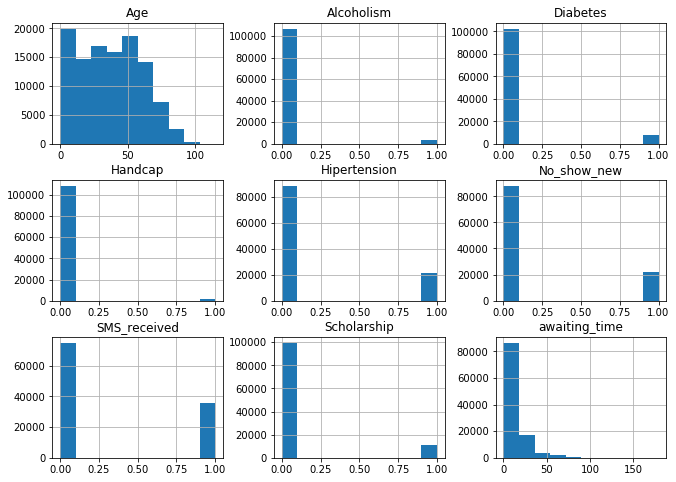

In [86]:
df_new.hist(figsize = (11, 8));

Based on the histogram, most of the patients do not have the problems of alcoholism, diabetes, handicap, hipertension. Besides, most of them do not receive scholarship. Additionally, the number of people who received SMS is as much as the people who did not receive, but the no-show people are half less than show_up people. 

<a id='eda'></a>
## Exploratory Data Analysis
<a id='Q1'></a>
### Q1: Do age affect a patient to show up in an appointment?

In [87]:
df_new.Age[df_new.No_show_new == 0].mean()

37.77709002941544

In [88]:
df_new.Age[df_new.No_show_new == 1].mean()

34.279306783998564

The mean of show-up and no-show are close.

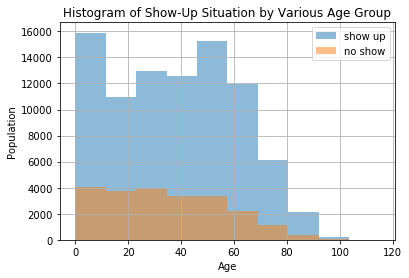

In [89]:
df_new.Age[df_new.No_show_new == 0].hist(alpha = 0.5, label = 'show up')
df_new.Age[df_new.No_show_new == 1].hist(alpha = 0.5, label = 'no show')
plt.title("Histogram of Show-Up Situation by Various Age Group")
plt.xlabel("Age")
plt.ylabel("Population");
plt.legend();

There are more people show up and both graphs are shewed right.

In [90]:
median_show = df_new.groupby('No_show_new').Age.median()
median_show

No_show_new
0    38
1    33
Name: Age, dtype: int64

The median show-up patients' age is 38. And the no-show patients' age is 33. They are close. 

In [91]:
no_show_population = df_new.loc[df_new.No_show_new == 1].shape[0]
no_show_population

22273

In [92]:
show_up_population = df_new.loc[df_new.No_show_new == 0].shape[0]
show_up_population

88049

In [93]:
show_up_population/no_show_population

3.953172001975486

The show-up population is four times as much as no-show people. Age is unlike to be a reason correlated with patients' missing appointments.

<a id='Q2'></a>
### Q2: Would patients miss their appointment because they did not receive message for reminder?

In [94]:
df_new.groupby(['SMS_received','No_show_new']).size()

SMS_received  No_show_new
0             0              62389
              1              12498
1             0              25660
              1               9775
dtype: int64

The number of patients who received SMS and showed up is 62389. The number of those who did not receive message and showed up is 25660. 

In [95]:
df_new.groupby(['SMS_received','No_show_new']).size().unstack()

No_show_new,0,1
SMS_received,,
0,62389,12498
1,25660,9775


In [96]:
#get the proportions of the two different groups
df_new.groupby(['SMS_received','No_show_new']).size().unstack().agg(lambda x: x/x.sum())

No_show_new,0,1
SMS_received,,
0,0.708571,0.561128
1,0.291429,0.438872


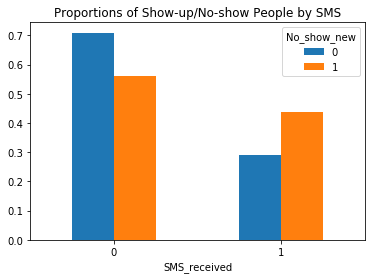

In [97]:
#plot the proportions of the data
df_new.groupby(['SMS_received','No_show_new']).size().unstack().agg(lambda x: x/x.sum()).plot(kind = 'bar', rot = 0)
# labels = ['No SMS', 'Received SMS']

# plt.bar(locations, heights, tick_label = labels)
plt.title('Proportions of Show-up/No-show People by SMS');

# plot(kind = 'bar', rot = 0);

The proportion of those who received messages is less than the part who did not receive one. Therefore, receiving SMS may not effectively imporve patients' attendance. There are many other factors for it. But, the proportion of people who received SMS and showed up is larger than those who received SMS and no showed. So, SMS could to a certain extent remind patients of meeting their appointments in time. 

<a id='Q3'></a>
## Q3: Is it because the period between scheduled day and appointment day is too long so that patients forget to meet their doctor?

In [98]:
df_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,No_show_new,awaiting_time
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0


In [99]:
df_new.awaiting_time.describe()

count    110322.000000
mean         10.187524
std          15.257955
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: awaiting_time, dtype: float64

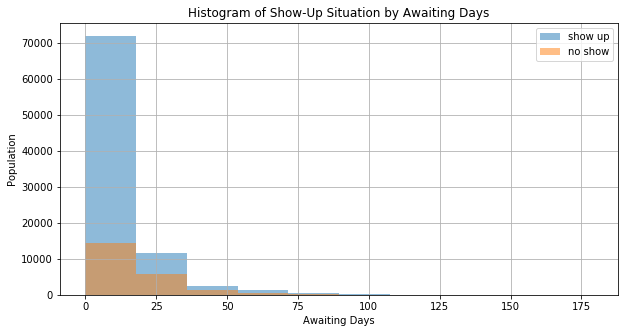

In [100]:
#create a histogram to find the relation between awaiting time and population
df_new.awaiting_time[df_new.No_show_new == 0].hist(alpha = 0.5, label = 'show up', figsize = (20,5))
df_new.awaiting_time[df_new.No_show_new == 1].hist(alpha = 0.5, label = 'no show', figsize = (10,5))

plt.title("Histogram of Show-Up Situation by Awaiting Days")
plt.xlabel("Awaiting Days")
plt.ylabel("Population")
plt.legend();

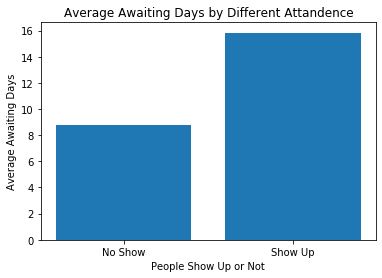

In [101]:
#create a bar chart
locations = [1, 2]
heights = df_new.groupby('No_show_new').awaiting_time.mean()
labels = ['No Show','Show Up']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Awaiting Days by Different Attandence')
plt.xlabel('People Show Up or Not')
plt.ylabel('Average Awaiting Days');

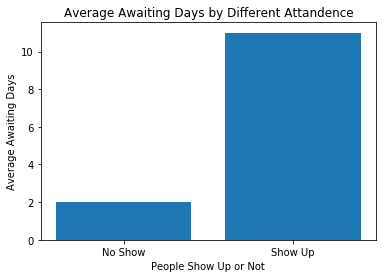

In [102]:
locations = [1, 2]
heights = df_new.groupby('No_show_new').awaiting_time.median()
labels = ['No Show','Show Up']

plt.bar(locations, heights, tick_label = labels)
plt.title('Average Awaiting Days by Different Attandence')
plt.xlabel('People Show Up or Not')
plt.ylabel('Average Awaiting Days');

Based on the two bar charts, one is based on mean of awaiting days, the other one is based on median awaiting days. From the descriptive statistics, the maximum awaiting days is 179, so avoiding the bias influence the result, median bar chart would be a best approach to reseach. So, for those no-show people, they need to wait for 11 days, but people only wait for 2 days in show-up group. Therefore, awaiting days affect patients' attandence, the longer time they wait, the less likely patients come in time.    

<a id='conclusions'></a>
## Conclusions

<b>Based on data analysis:</b>
<ol>
<li>Most new borned babies would meet their appointment in time. The median of patients' age for show-up group is 38, so patients who are around thirty-something prefer to go to hospital. Age could not be a main reason related to those missing appointments.</li>
<li>People would expect that patients who received reminder SMS would less likely to miss their appointment, but based on the analysis with question 2, we found the number of patients with no SMS is more than the opposite one. So, we could not say sending reminder SMS is a good way to remind patients, maybe there are more reasons including sending time, contents, reminder ways.</li>
<li>From the question 3 above, patients who waited for many days might not show up in their appointments. They might forget their appointment bacause of the long-wait. Or, they found another hospital to receive treatment and forget to cancel appointment. So, improving the hospital's effectiveness and speeding up the process so that patients would show up frequently. </li>
</ol>
<b>Limitations of dataset:</b>
<ol>
<li>There are also many factors affect patients' attendance that the dataset did not include. If we want to have a thoughtful analysis, we need to consider many aspects such as the distance between patients' home and hospitals, and what kinds of transportation do patients choose? Or how much income of paients' family?</li>
<li>The dataset collects the data from many hospital in Brazil, for a better research of medical appointment system, we could collect more data in various countries like America, China, Britain etc. Because every country has its own medical system and it might change the results in different environment.</li>
</ol>